In [176]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [96]:
import numpy as np
import pandas as pd

In [97]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [98]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [99]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [100]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [101]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [102]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [103]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

---------------------------------------------

In [104]:
# Design a query to retrieve the last 12 months from 08-23-2017 of precipitation data and plot the results

precip_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.date <= "2017-08-23").all()


In [105]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

precip_df = pd.DataFrame(precip_data)
precip_df['date'] = pd.to_datetime(precip_df['date'])
precip_df.set_index('date').head()

prcp
date            
2016-08-23  0.00
2016-08-24  0.08
2016-08-25  0.08
2016-08-26  0.00
2016-08-27  0.00

<IPython.core.display.Javascript object>


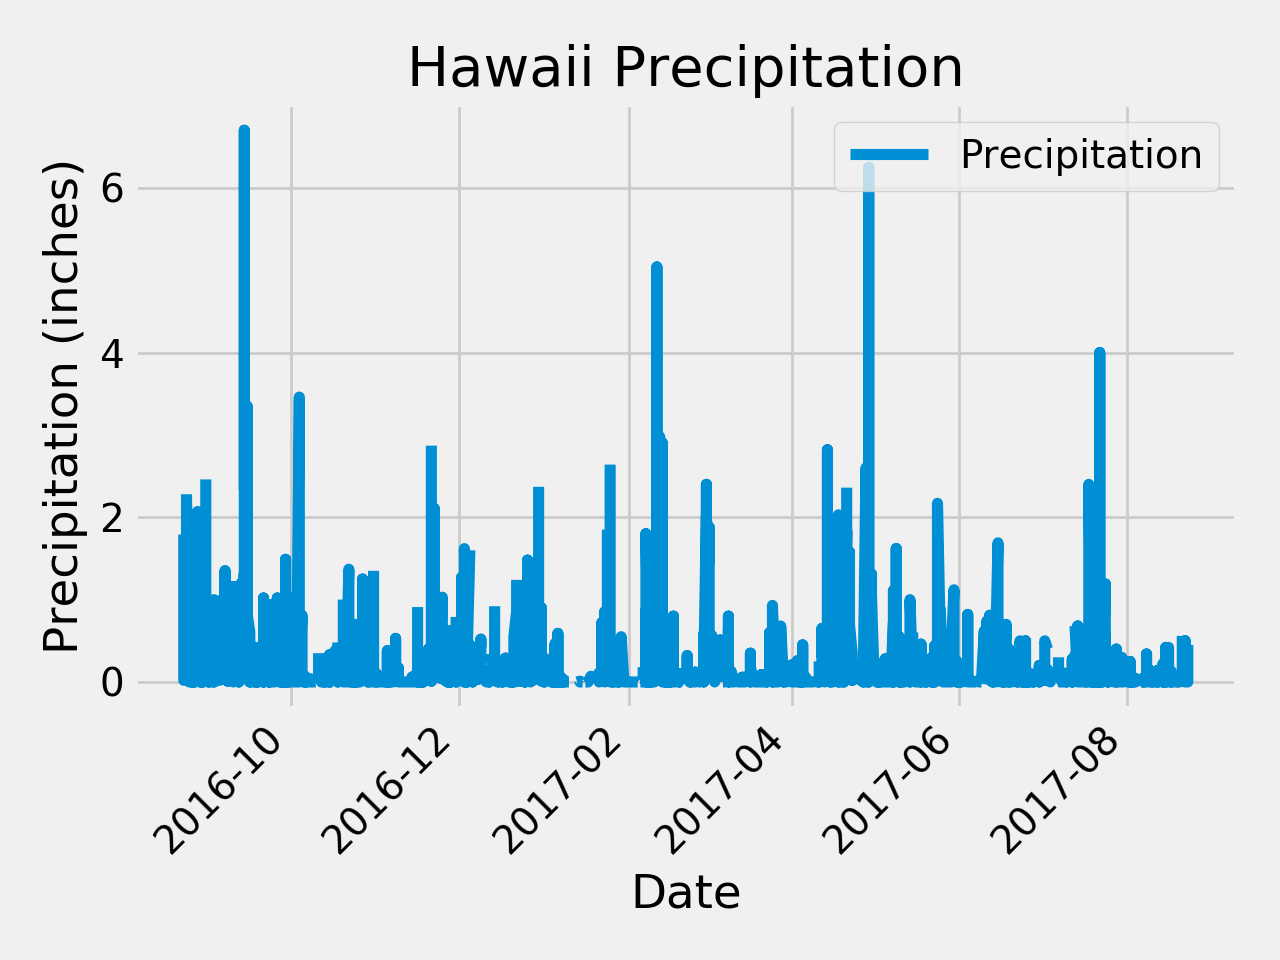

In [179]:
# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates

precip_df.plot('date', 'prcp')
plt.title('Hawaii Precipitation')
plt.ylabel('Precipitation (inches)')
plt.xlabel('Date')
plt.legend(['Precipitation'], loc=1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [107]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

In [108]:
# How many stations are available in this dataset?

stations = session.query(Station.station).count()
stations

9

In [109]:
# What are the most active stations?
# List the stations and the counts in descending order.

station_activity = session.query(Station.name, Measurement.station, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
station_activity

[('WAIHEE 837.5, HI US', 'USC00519281', 2772),
 ('WAIKIKI 717.2, HI US', 'USC00519397', 2724),
 ('KANEOHE 838.1, HI US', 'USC00513117', 2709),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 2669),
 ('MANOA LYON ARBO 785.2, HI US', 'USC00516128', 2612),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830', 2202),
 ('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918', 1979),
 ('PEARL CITY, HI US', 'USC00517948', 1372),
 ('UPPER WAHIAWA 874.3, HI US', 'USC00518838', 511)]

In [166]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

waihee_temps = session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281', Measurement.station == Station.station).all()
waihee_temps

[(85.0, 54.0, 71.66378066378067)]

In [169]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
filter(Measurement.station == 'USC00519281', Measurement.date >= "2016-08-23").\
order_by(Measurement.date).all()

temperature_df = pd.DataFrame(temperature)
temperature_df

station        date  tobs
0    USC00519281  2016-08-23  77.0
1    USC00519281  2016-08-24  77.0
2    USC00519281  2016-08-25  80.0
3    USC00519281  2016-08-26  80.0
4    USC00519281  2016-08-27  75.0
5    USC00519281  2016-08-28  73.0
6    USC00519281  2016-08-29  78.0
7    USC00519281  2016-08-30  77.0
8    USC00519281  2016-08-31  78.0
9    USC00519281  2016-09-01  80.0
10   USC00519281  2016-09-02  80.0
11   USC00519281  2016-09-03  78.0
12   USC00519281  2016-09-04  78.0
13   USC00519281  2016-09-05  78.0
14   USC00519281  2016-09-06  73.0
15   USC00519281  2016-09-07  74.0
16   USC00519281  2016-09-08  80.0
17   USC00519281  2016-09-09  79.0
18   USC00519281  2016-09-10  77.0
19   USC00519281  2016-09-11  80.0
20   USC00519281  2016-09-12  76.0
21   USC00519281  2016-09-13  79.0
22   USC00519281  2016-09-14  75.0
23   USC00519281  2016-09-15  79.0
24   USC00519281  2016-09-16  78.0
25   USC00519281  2016-09-17  79.0
26   USC00519281  2016-09-18  78.0
27   USC00519281  2016-09-19  78.0
28   USC00519281  2016-09-20  76.0
29   USC00519281  2016-09-21  74.0
..           ...         ...   ...
322  USC00519281  2017-07-11  72.0
323  USC00519281  2017-07-12  74.0
324  USC00519281  2017-07-13  74.0
325  USC00519281  2017-07-14  76.0
326  USC00519281  2017-07-15  80.0
327  USC00519281  2017-07-16  80.0
328  USC00519281  2017-07-17  76.0
329  USC00519281  2017-07-18  76.0
330  USC00519281  2017-07-19  76.0
331  USC00519281  2017-07-20  77.0
332  USC00519281  2017-07-21  77.0
333  USC00519281  2017-07-22  77.0
334  USC00519281  2017-07-23  82.0
335  USC00519281  2017-07-24  75.0
336  USC00519281  2017-07-25  77.0
337  USC00519281  2017-07-26  75.0
338  USC00519281  2017-07-27  76.0
339  USC00519281  2017-07-28  81.0
340  USC00519281  2017-07-29  82.0
341  USC00519281  2017-07-30  81.0
342  USC00519281  2017-07-31  76.0
343  USC00519281  2017-08-04  77.0
344  USC00519281  2017-08-05  82.0
345  USC00519281  2017-08-06  83.0
346  USC00519281  2017-08-13  77.0
347  USC00519281  2017-08-14  77.0
348  USC00519281  2017-08-15  77.0
349  USC00519281  2017-08-16  76.0
350  USC00519281  2017-08-17  76.0
351  USC00519281  2017-08-18  79.0

[352 rows x 3 columns]

------------------------------------------

<IPython.core.display.Javascript object>


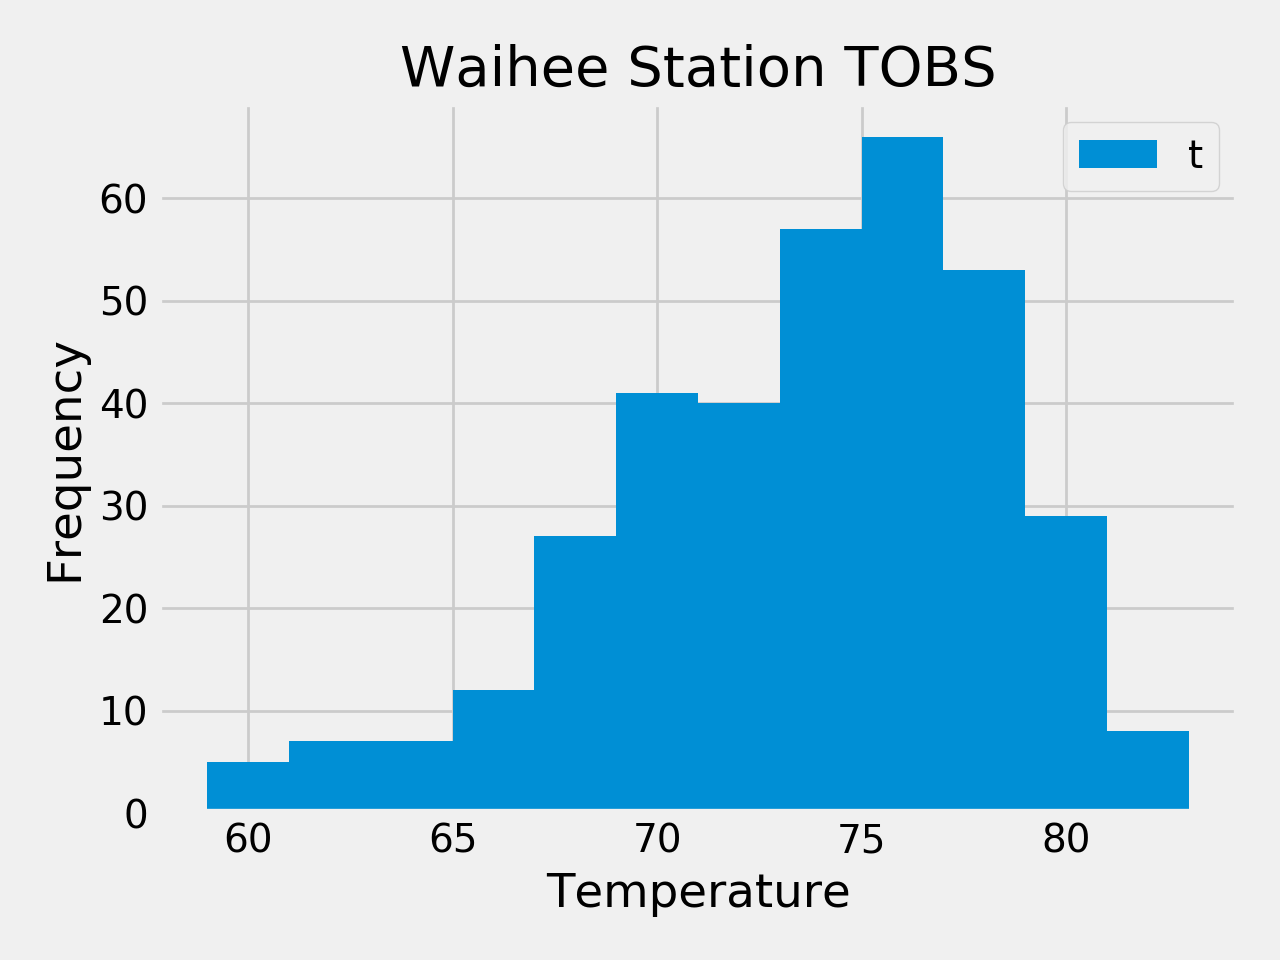

In [180]:
plt.hist(temperature_df['tobs'], bins=12)
plt.title("Waihee Station TOBS")
plt.ylabel("Frequency")
plt.xlabel('Temperature')
plt.legend('tobs')
plt.tight_layout()
plt.show()

In [181]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [197]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
my_trip = calc_temps('2017-06-15', '2017-06-22')

my_trip

[(72.0, 76.96078431372548, 82.0)]

<IPython.core.display.Javascript object>


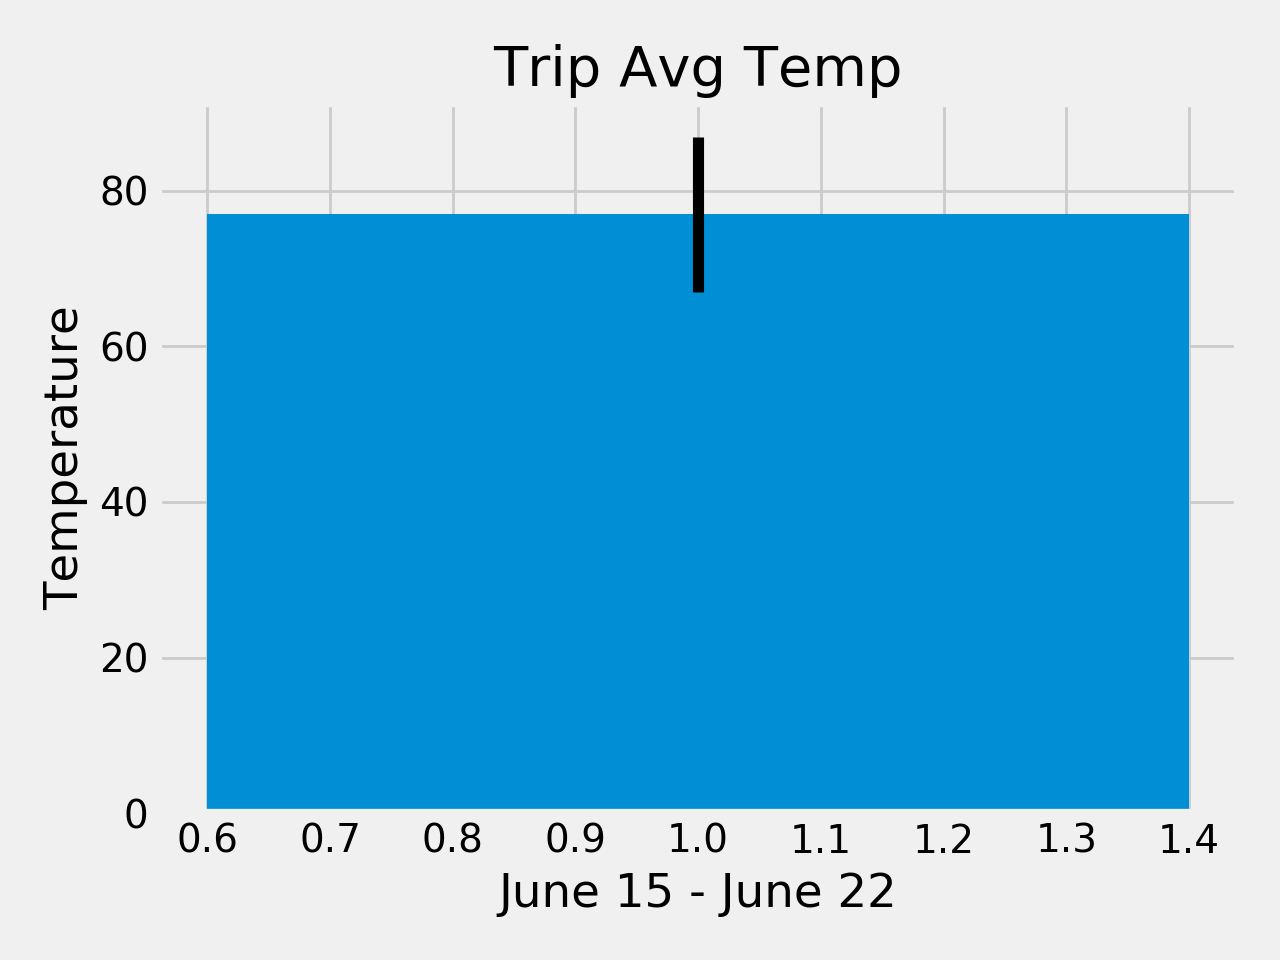

In [211]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

min_temp = my_trip[0][0]
avg_temp = my_trip[0][1]
max_temp = my_trip[0][2]
x = len(my_trip)


plt.bar(x, avg_temp, yerr=(max_temp - min_temp))
plt.ylabel("Temperature")
plt.xlabel("June 15 - June 22")
plt.title('Trip Avg Temp')
plt.tight_layout()
plt.show()

In [256]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

trip_precip_data = session.query(Measurement.station, Station.name, func.sum(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation).\
filter(Measurement.date >= "2017-06-15", Measurement.date <= "2017-06-22", Measurement.station == Station.station).group_by(Measurement.station).\
order_by(func.sum(Measurement.prcp).desc()).all()

trip_precip_data


[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  3.88,
  21.3331,
  -157.8025,
  152.4),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  1.2500000000000002,
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  1.0100000000000002,
  21.4234,
  -157.8015,
  14.6),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  0.88,
  21.5213,
  -157.8374,
  7.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 0.07, 21.2716, -157.8168, 3.0),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  0.01,
  21.33556,
  -157.71139,
  19.5),
 ('USC00517948', 'PEARL CITY, HI US', 0.0, 21.3934, -157.9751, 11.9)]

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


tmin       tavg  tmax
date                             
2018-01-01  62.0  69.153846  77.0
2018-01-02  60.0  69.396226  77.0
2018-01-03  62.0  68.909091  77.0
2018-01-04  58.0  70.000000  76.0
2018-01-05  56.0  67.964286  76.0

<IPython.core.display.Javascript object>


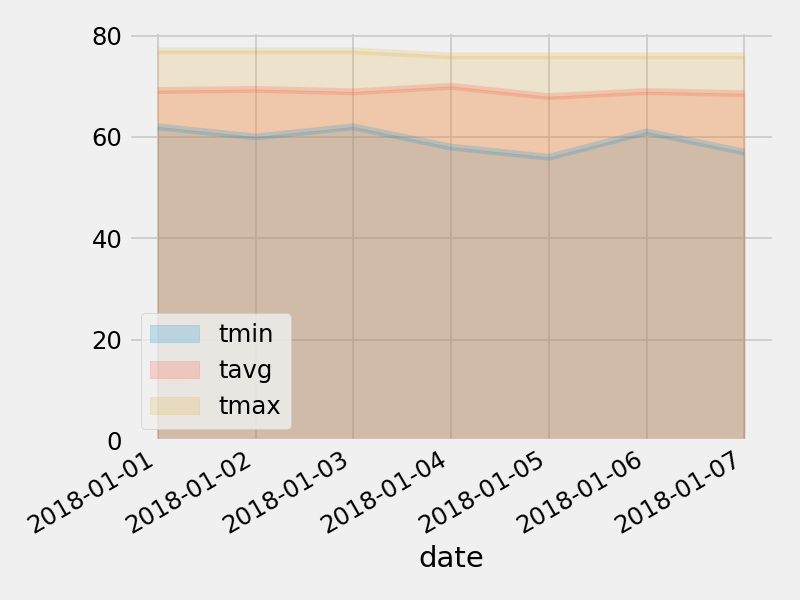

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
